# A simple NeuralNet with TensorFlow

Simple image classifier 

In [51]:
from __future__ import print_function

import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

load data

In [52]:
data = np.load('classification_dir/data.npz')


x_train = data['x_train'] 
y_train = data['y_train']

x_test = data['x_test']
y_test = data['y_test']

print ("size of training data", x_train.shape)
print ("size of test data", x_test.shape)


size of training data (209, 256, 256, 3)
size of test data (53, 256, 256, 3)


In [53]:
xchips, rows, cols, bands = x_train.shape
x_trainReshaped = x_train.reshape(xchips, rows*cols*bands)
ychips, rows, cols, bands = x_test.shape

x_testReshaped = x_test.reshape(ychips, rows*cols*bands)
x_trainReshaped.shape, x_testReshaped.shape

((209, 196608), (53, 196608))

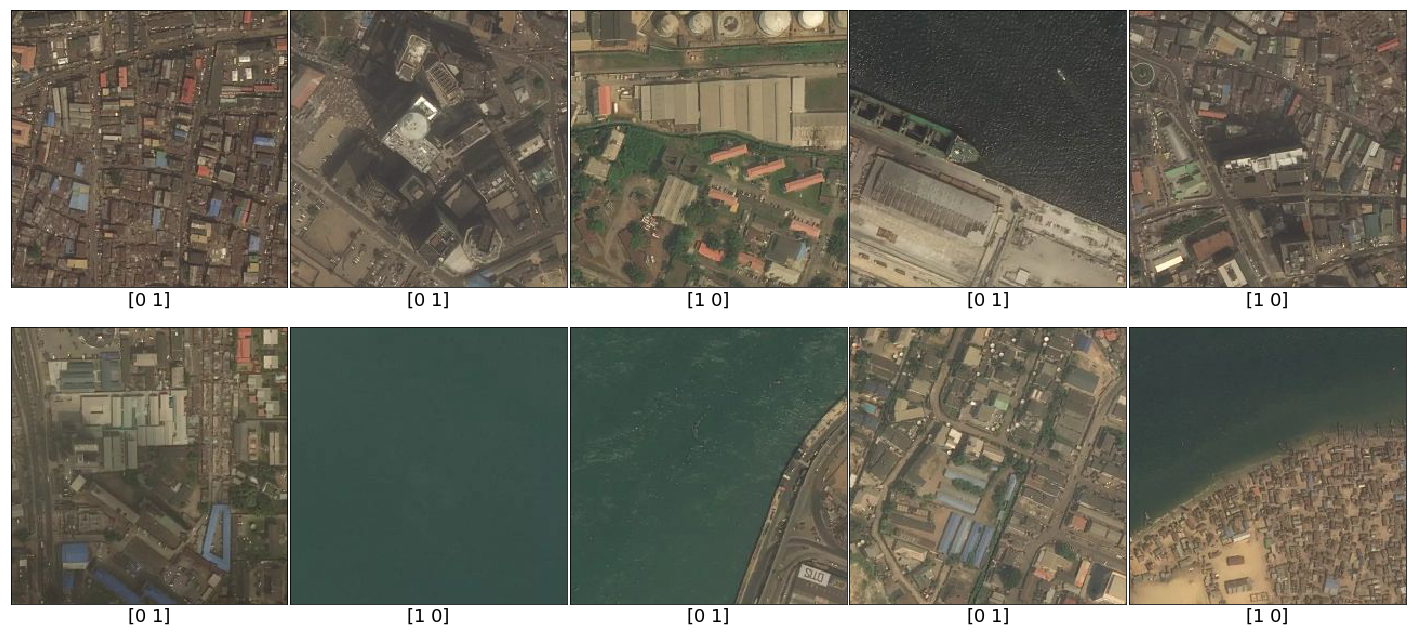

In [61]:
sample_train_data= x_train[0:10,:,:]
sample_label_data= y_train[0:10:,]

plt.figure(figsize=(25,25))
plt.subplots_adjust(bottom=0, top=0.35, wspace=0.01, hspace=0.01)
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(sample_train_data[i])
    plt.xlabel(sample_label_data[i], fontsize=18)

tune parameters

In [54]:
# parameters
learning_rate = 0.1
num_steps = 300
batch_size = 128
display_step = 10

#layers
n_hidden_1 = 50
n_hidden_2 = 100
n_hidden_3 = 30

# inputs and targets
num_input = 196608
#num_input = 155516928
num_classes = 2

# tensorflow graph inputs
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])

In [55]:
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_hidden_3, num_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

In [56]:
def neural_net(x):
    
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1']) # 50
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']) #100
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3']) # 30
    out_layer = tf.matmul(layer_3, weights['out']) + biases['out']
    
    return out_layer

In [57]:

logits = neural_net(X)


loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
            logits = logits, labels=Y))

optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
train_op = optimizer.minimize(loss_op)

# prediction and accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

init = tf.global_variables_initializer()

saver = tf.train.Saver()


In [58]:
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [59]:


with tf.Session() as sess:
    
    sess.run(init)
    
    train_acc_all = []
    train_loss_all = []
    
    for step in range(1, num_steps+1):
        batch_x, batch_y = next_batch(batch_size, x_trainReshaped, y_train)
        
        #feed back propagation to optimizer
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        
        if step % display_step == 0 or step ==1:
            
                
            #calculate loss and accuracy
            loss, acc = sess.run([loss_op, accuracy],
                                feed_dict={X: batch_x,
                                           Y: batch_y})
            train_acc_all.append(acc)
            train_loss_all.append(loss)
            print("Step" + str(step) + ", batch loss = " + \
                 "{:.4f}".format(loss) + ", Training accuracy = " + \
                 "{:.3f}".format(acc))
           
            
    print("Done !")
    
    print("Testing accuracy: ", \
         sess.run(accuracy, feed_dict={X: x_testReshaped,
                                       Y: y_test}))

    saver.save(sess, './final_weights.ckpt')

Step1, batch loss = 2250535424.0000, Training accuracy = 0.500
Step10, batch loss = 360465408.0000, Training accuracy = 0.523
Step20, batch loss = 12235790.0000, Training accuracy = 0.477
Step30, batch loss = 28779184.0000, Training accuracy = 0.469
Step40, batch loss = 31193538.0000, Training accuracy = 0.500
Step50, batch loss = 1418494.3750, Training accuracy = 0.516
Step60, batch loss = 6946369.0000, Training accuracy = 0.523
Step70, batch loss = 2637404.5000, Training accuracy = 0.516
Step80, batch loss = 1017963.7500, Training accuracy = 0.508
Step90, batch loss = 307644.1875, Training accuracy = 0.523
Step100, batch loss = 103435.5625, Training accuracy = 0.617
Step110, batch loss = 122314.2734, Training accuracy = 0.516
Step120, batch loss = 51741.5742, Training accuracy = 0.633
Step130, batch loss = 18795.4277, Training accuracy = 0.641
Step140, batch loss = 17402.1211, Training accuracy = 0.703
Step150, batch loss = 9102.9561, Training accuracy = 0.781
Step160, batch loss = 2

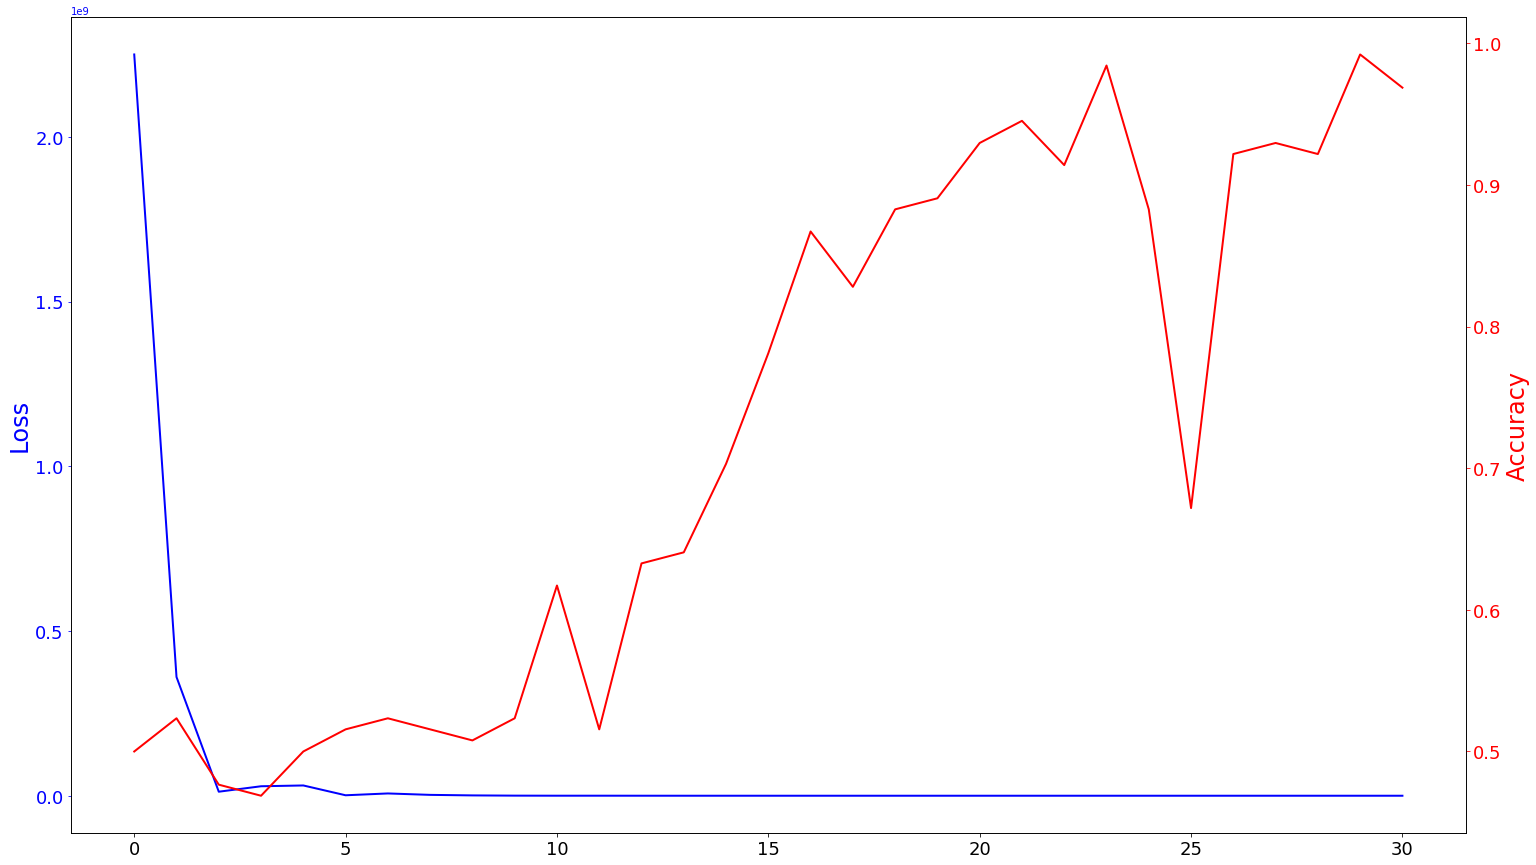

In [60]:

fig, ax1 = plt.subplots(figsize=(25,15))

xmin=-1.0 
xmax=1.0
loss_max=5


xmin = xmin if xmin != -1.0 else min(train_acc_all)
xmax = xmax if xmax != 1.0 else max(train_acc_all)

ax2 = ax1.twinx()

tr_loss, = ax1.plot(train_loss_all, 'b-', label='Training loss', linewidth=2)
tr_acc, = ax2.plot(train_acc_all, 'r-', label='Training accuracy', linewidth=2)

ax1.set_ylabel('Loss', color='b', fontsize=24)
ax1.tick_params('y', colors='b', labelsize=18)
ax1.tick_params('x', labelsize=18)

ax2.set_ylabel('Accuracy', color='r', fontsize=24)

ax2.tick_params('y', colors='r', labelsize=18)
